# 1. Import relevant libraries

In [1]:
import pandas as pd

# 2. Import News Classification Dataset

In [2]:
df = pd.read_csv("News_classifier.csv")
df

,Title,Excerpt,Category
0,"Uefa Opens Proceedings against Barcelona, Juve...",Uefa has opened disciplinary proceedings again...,sports
1,Amazon Blames Inflation as It Increases Cost o...,The increases are steeper than the 17 percent ...,business
2,Nigeria’s Parliament Passes Amended Electoral ...,Nigeria's Senate on Tuesday passed the harmoni...,politics
3,Nigeria: Lagos Governor Tests Positive for Cov...,"The Lagos State Governor, Mr. Babajide Sanwo-O...",health
4,South Africa Calls For Calm as Electoral Refor...,South Africa has raised concerns about the det...,politics
...,...,...,...
5509,Nigeria’s Central Bank Introduces ‘Naira 4 Dol...,The Central Bank of Nigeria (CBN) has introduc...,business
5510,Super Eagles to Host Leone Stars in AFCON 2023...,Following Tuesday night’s draw for the qualifi...,sports
5511,Frustration in Nigeria Breeding Calls for Sece...,"Ekiti State Governor, Dr. Kayode Fayemi on Tue...",politics
5512,Coca-Cola European Buys Australian Bottler for...,Coca-Cola European Partners Plc has agreed to ...,business


## Explanation

- Columns: Title (headline), Excerpt (summary), Category (news label).

- Rows: 5514 news articles, indexed 0–5513.

- Sample: Shows first few articles with their categories, e.g., sports, business, health.

- Purpose: Quick preview to understand dataset structure before analysis or modeling.

---
# 3.  Exploratory Data Analysis (EDA)

 Rows with missing values in important columns were removed to ensure data consistency.


In [3]:
# Check shape
print("Dataset Shape:", df.shape)

Dataset Shape: (5514, 3)


In [4]:
# Check missing values
missing = df.isnull().any().sum()
missing

np.int64(1)

In [5]:
## Check column types
df.dtypes

Title       object
Excerpt     object
Category    object
dtype: object

In [6]:
col = df.columns[df.isnull().any()].tolist()
col

['Title']

In [7]:
for each in df.columns:
    print("Column: ",each) # the column name
    print(df[each].nunique()) # the number of unique values in that column
    print("~"*100) # a separator line for better readability

Column:  Title
5313
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Column:  Excerpt
5313
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Column:  Category
6
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5514 entries, 0 to 5513
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     5513 non-null   object
 1   Excerpt   5514 non-null   object
 2   Category  5514 non-null   object
dtypes: object(3)
memory usage: 129.4+ KB


## Explanation

- Dataset shape: 5514 rows × 3 columns (Title, Excerpt, Category).

- Missing values: Only 1 missing value in Title.

- Column types: All columns are object (text).

- Unique values:

    - Title: 5313 unique headlines

    - Excerpt: 5313 unique summaries

    - Category: 6 distinct news categories

- Purpose: Confirms dataset is mostly complete and ready for preprocessing; identifies the column (Title) with a missing value to handle.

---
# 4. Handle Missing Values

In [9]:
# Drop rows with missing values in Title, Excerpt, or Category
df = df.dropna(subset=['Title', 'Excerpt', 'Category'])

# Verify missing values are gone
df.isnull().sum()


Title       0
Excerpt     0
Category    0
dtype: int64

## Explanation

- Action taken: Dropped rows that had missing values in Title, Excerpt, or Category.

- Result: All missing values are removed.

- Verification: Title, Excerpt, and Category now have 0 missing entries.

- Purpose: Ensures dataset consistency and avoids errors during preprocessing or model training.

---
# 5. Combine Title + Excerpt
 The Title and Excerpt columns are merged to form a single text feature in order to capture both concise keywords and contextual information.

In [10]:
# Wrong attempt (mistake): assigned directly to a slice, which gives SettingWithCopyWarning
# df['text'] = df['Title'] + ' ' + df['Excerpt']

# Corrected code: make a copy and safely assign
df = df.copy()  # create a copy to avoid warnings
df['text'] = df['Title'].astype(str) + ' ' + df['Excerpt'].astype(str)
# Show first 5 rows of Title, Excerpt, and combined text
df[['Title', 'Excerpt', 'text']].head()

,Title,Excerpt,text
0,"Uefa Opens Proceedings against Barcelona, Juve...",Uefa has opened disciplinary proceedings again...,"Uefa Opens Proceedings against Barcelona, Juve..."
1,Amazon Blames Inflation as It Increases Cost o...,The increases are steeper than the 17 percent ...,Amazon Blames Inflation as It Increases Cost o...
2,Nigeria’s Parliament Passes Amended Electoral ...,Nigeria's Senate on Tuesday passed the harmoni...,Nigeria’s Parliament Passes Amended Electoral ...
3,Nigeria: Lagos Governor Tests Positive for Cov...,"The Lagos State Governor, Mr. Babajide Sanwo-O...",Nigeria: Lagos Governor Tests Positive for Cov...
4,South Africa Calls For Calm as Electoral Refor...,South Africa has raised concerns about the det...,South Africa Calls For Calm as Electoral Refor...


## Explanation

- Action taken: Merged Title and Excerpt columns into a new text column.

- Purpose: Combines concise headlines with contextual content to create a richer text feature for analysis.

- Correction: Made a copy of the DataFrame before assignment to avoid SettingWithCopyWarning.

- Result: Each row now has a single text column containing the full article content, ready for preprocessing.

---

## 6. Text Preprocessing

Text preprocessing includes:
- Lowercasing
- Removing punctuation and numbers
- Stopword removal
- Lemmatization


In [11]:
# Text preprocessing libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove numbers, punctuation, and special characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize text
    tokens = text.split()
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join tokens back into a string
    return ' '.join(tokens)

# Apply preprocessing
df['clean_text'] = df['text'].apply(preprocess_text)

# Check first 5 cleaned texts
df[['text', 'clean_text']].head()


,text,clean_text
0,"Uefa Opens Proceedings against Barcelona, Juve...",uefa open proceeding barcelona juventus real m...
1,Amazon Blames Inflation as It Increases Cost o...,amazon blame inflation increase cost prime eur...
2,Nigeria’s Parliament Passes Amended Electoral ...,nigeria parliament pass amended electoral bill...
3,Nigeria: Lagos Governor Tests Positive for Cov...,nigeria lagos governor test positive covid kad...
4,South Africa Calls For Calm as Electoral Refor...,south africa call calm electoral reform protes...


## Explanation

- Action taken: Applied text preprocessing to the combined text column.

- Steps included:

    - Converted text to lowercase.

    - Removed numbers, punctuation, and special characters.

    - Tokenized the text.

    - Removed English stopwords.

    - Applied lemmatization to reduce words to their base form.

- Result: Created a new column clean_text with simplified, normalized text suitable for feature extraction and modeling.



---
# 7. Visualize category distribution

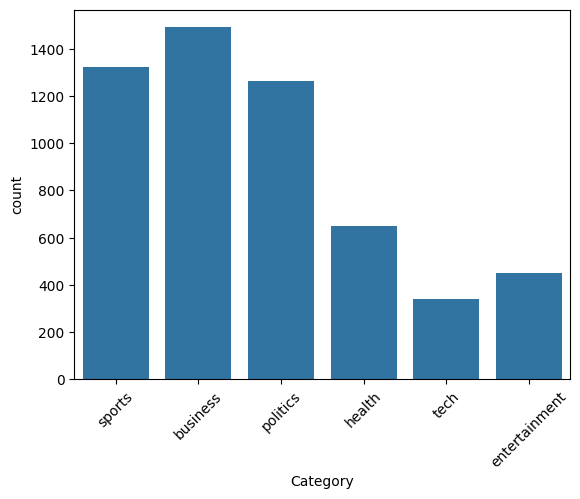

In [12]:
import seaborn as sns 
import matplotlib.pyplot as plt
# Wrong attempt (mistake): forgot to import matplotlib, so plt.xticks would fail
sns.countplot(data=df, x='Category')
plt.xticks(rotation=45)
plt.show()


## Explanation

- Action: Visualized the distribution of news categories using a bar plot.

- Observation from the plot:

    - business articles are the most frequent.

    - sports and politics also have high counts.

    - health, entertainment, and especially tech are less frequent.

- Insight: The dataset is imbalanced, which may affect model performance, particularly for underrepresented categories like tech and entertainment.

- Purpose: Helps understand class distribution before training a classification model and informs potential strategies like oversampling, undersampling, or class weighting.

---

# 8. Most Frequent Terms in the News Corpus (Word Cloud Representation)


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


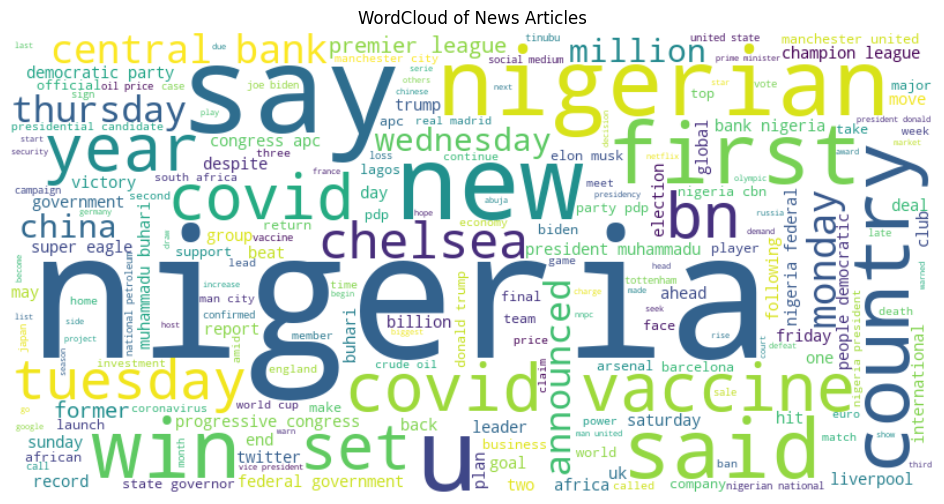

In [13]:
# Install WordCloud if not already installed
!pip install wordcloud

from wordcloud import WordCloud

# Generate wordcloud for cleaned text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['clean_text']))

# Display the wordcloud
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of News Articles")
plt.show()


## Explanation

- Action: Generated a WordCloud to visualize the most frequent words across all news articles.

- Observation from the WordCloud:

    - Words that appear larger are more frequent in the dataset.

    - Common terms like nigeria, president, say, covid, etc., dominate the news corpus.

- Purpose: Provides a quick visual summary of the dataset’s content, highlighting prominent keywords and helping understand the textual patterns before model training.

- Note: WordCloud focuses on raw word frequency, not weighted importance (like TF-IDF), so it shows what words appear most often regardless of context.


---
# 9. Check Most repeated word

In [14]:
from collections import Counter

# Combine all cleaned text into a single string
all_text = ' '.join(df['clean_text'])

# Split into words and convert to lowercase (already lowercase, but safe)
words = all_text.split()

# Count the 10 most common words
common_words = Counter(words).most_common(10)

print(common_words)


[('nigeria', 2620), ('say', 786), ('president', 785), ('covid', 744), ('nigerian', 643), ('governor', 606), ('u', 594), ('state', 539), ('new', 536), ('first', 467)]


## Explanation

- Action: Counted the most frequent words in the cleaned text using Python’s Counter.

- Top 10 Words and Frequency:

1. nigeria – 2620 occurrences

2. say – 786 occurrences

3. president – 785 occurrences

4. covid – 744 occurrences

5. nigerian – 643 occurrences

6. governor – 606 occurrences

7. u – 594 occurrences

8. state – 539 occurrences

9. new – 536 occurrences

10. first – 467 occurrences

- Purpose: Highlights the most repeated keywords in the dataset, giving insight into the main topics and entities mentioned frequently in the news articles.

- Observation: Words like nigeria, president, and covid dominate, reflecting a strong focus on political and health-related news.

--- 
# 10. Train–Test Split

The dataset is split into training and testing sets before feature extraction 
to avoid data leakage.


In [15]:
# Wrong attempt (mistake): forgot to split before TF-IDF
# Corrected approach
# Features and labels
X = df['clean_text']
y = df['Category']

# Split dataset into training and testing sets (80-20)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 4410
Testing samples: 1103


## Explanation

- Action: Split the dataset into training and testing sets before converting text to TF-IDF features.

- Reason: Prevents data leakage by ensuring the model does not “see” test data during feature extraction or training.

- Details:

    - Features (X) = clean_text column

    - Labels (y) = Category column

    - Split ratio = 80% training, 20% testing

    - stratify=y ensures class distribution in train/test sets matches the original dataset.

- Output:

    - Training samples: 4410

    - Testing samples: 1103

- Purpose: This step prepares the data for model training while maintaining a representative distribution of categories.

---
# 11. TF-IDF Feature Extraction

TF-IDF is applied to convert textual data into numerical feature vectors.
The vectorizer is fitted only on the training data to prevent data leakage.


In [16]:
# Convert text to TF-IDF numerical features
from sklearn.feature_extraction.text import TfidfVectorizer
# Wrong attempt (mistake): fitting TF-IDF on full dataset
# tfidf = TfidfVectorizer()
# tfidf.fit_transform(df['clean_text'])

# Corrected approach
# Initialize TF-IDF with max 5000 features
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

# Fit TF-IDF on training set and transform both training and testing sets
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Check shapes
X_train_tfidf.shape, X_test_tfidf.shape



((4410, 5000), (1103, 5000))

## Explanation

- Action: Convert text data into numerical features using TF-IDF (Term Frequency–Inverse Document Frequency).

- Reason: Machine learning models require numeric input, so TF-IDF represents each document as a weighted vector reflecting word importance.

- Details:

    - max_features=5000 limits to the 5000 most important words to reduce dimensionality.

    - ngram_range=(1,2) captures both single words (unigrams) and pairs of consecutive words (bigrams).

    - Fit the vectorizer only on training data to avoid data leakage.

    - Transform both training and test sets using the fitted vectorizer.

- Output shapes:

    - Training set: 4410 samples × 5000 features

    - Testing set: 1103 samples × 5000 features

- Purpose: Prepares the data for model training with meaningful numeric features while preventing information from the test set from leaking into training.

---
# 12. Model 1: Multinomial Naive Bayes


In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train model
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

# Predict on test set
nb_pred = nb.predict(X_test_tfidf)

# Evaluate model
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))


Naive Bayes Accuracy: 0.8495013599274706
               precision    recall  f1-score   support

     business       0.74      0.93      0.83       298
entertainment       0.93      0.62      0.75        90
       health       0.92      0.76      0.83       129
     politics       0.85      0.93      0.89       253
       sports       0.96      0.97      0.96       265
         tech       0.76      0.19      0.31        68

     accuracy                           0.85      1103
    macro avg       0.86      0.73      0.76      1103
 weighted avg       0.86      0.85      0.84      1103



## Output Explanation 

- Accuracy (~85%): The model correctly classifies most news articles, showing solid overall performance.

- Strong categories: Sports and Politics perform very well due to clear, frequent keywords.

- Moderate categories: Business and Health are classified fairly accurately but still show some confusion.

- Weak category (Tech): Very low recall, meaning many tech articles are missed—this is mainly due to fewer samples (class imbalance).

- Key insight: Naive Bayes works well for common categories but struggles with underrepresented ones, highlighting the need for better balance or a stronger model.

---
# 13. Model 2: Logistic Regression


In [18]:
from sklearn.linear_model import LogisticRegression
# Wrong attempt (mistake): default max_iter caused convergence warning
# lr = LogisticRegression()

# Corrected approach
# Initialize logistic regression with higher max_iter to avoid warnings
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)

# Predict on test set
lr_pred = lr.predict(X_test_tfidf)

# Evaluate model
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))


Logistic Regression Accuracy: 0.85766092475068
               precision    recall  f1-score   support

     business       0.77      0.89      0.83       298
entertainment       0.89      0.70      0.78        90
       health       0.92      0.79      0.85       129
     politics       0.86      0.94      0.90       253
       sports       0.97      0.97      0.97       265
         tech       0.59      0.34      0.43        68

     accuracy                           0.86      1103
    macro avg       0.83      0.77      0.79      1103
 weighted avg       0.86      0.86      0.85      1103



## Output Explanation

- Accuracy (~86%): Logistic Regression perform slightly bettwer then outperforms Naive Bayes, making it the better overall model here.

- Strong performance: Sports and Politics show excellent precision and recall, meaning predictions are both accurate and consistent.

- Improved balance: Health and Entertainment perform better than in Naive Bayes, showing stronger generalization.

- Tech still weak: Recall is low, so many tech articles are still misclassified—class imbalance is the main issue.

- Key insight: Logistic Regression handles TF-IDF features better than Naive Bayes and is more reliable across categories, but rare classes still need improvement (more data or class weighting).

--- 
# 14. Confusion Matrix

A confusion matrix is used to visualize the performance of the classification model
by showing the number of correct and incorrect predictions for each class.


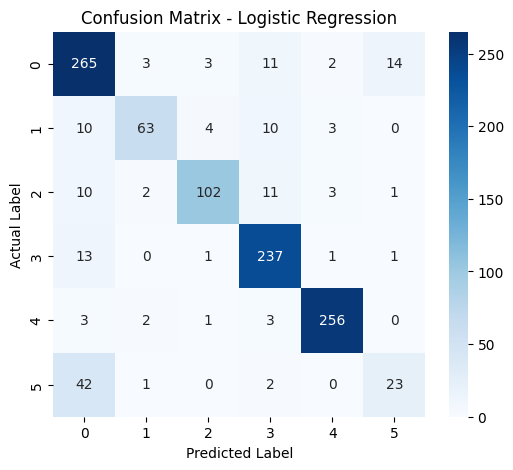

In [19]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for Logistic Regression
cm = confusion_matrix(y_test, lr_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


## Explanation

- Diagonal cells show correct predictions — higher values here mean better performance.

- Most predictions fall on the diagonal, confirming Logistic Regression is classifying most articles correctly.

- Sports and Politics have very strong diagonals → these classes are easiest for the model to identify.

- Tech has more off-diagonal values, meaning tech articles are often confused with business or politics.

- Key takeaway: Overall model performance is strong, but minority classes (especially tech) suffer from misclassification due to fewer training examples.

---
# 15. Model Comparison

The performance of Naive Bayes and Logistic Regression is compared using
accuracy, precision, recall, and F1-score.


In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

comparison_results = {
    "Model": ["Naive Bayes", "Logistic Regression"],
    "Accuracy": [
        accuracy_score(y_test, nb_pred),
        accuracy_score(y_test, lr_pred)
    ],
    "Precision": [
        precision_score(y_test, nb_pred, average='weighted'),
        precision_score(y_test, lr_pred, average='weighted')
    ],
    "Recall": [
        recall_score(y_test, nb_pred, average='weighted'),
        recall_score(y_test, lr_pred, average='weighted')
    ],
    "F1-Score": [
        f1_score(y_test, nb_pred, average='weighted'),
        f1_score(y_test, lr_pred, average='weighted')
    ]
}

comparison_df = pd.DataFrame(comparison_results)
comparison_df


,Model,Accuracy,Precision,Recall,F1-Score
0,Naive Bayes,0.849501,0.856077,0.849501,0.835496
1,Logistic Regression,0.857661,0.855459,0.857661,0.851560


## Explanation

- Logistic Regression slightly outperforms Naive Bayes across all metrics.

- Accuracy is higher for Logistic Regression (0.858 vs 0.850), meaning more overall correct predictions.

- Recall improvement shows Logistic Regression identifies relevant classes more consistently.

- F1-score is noticeably higher for Logistic Regression, indicating a better balance between precision and recall.

- Naive Bayes is still competitive, but Logistic Regression is the stronger and more reliable model for this dataset.

---
# 16. Comparing model scores: Naive Bayes vs Logistic Regression.

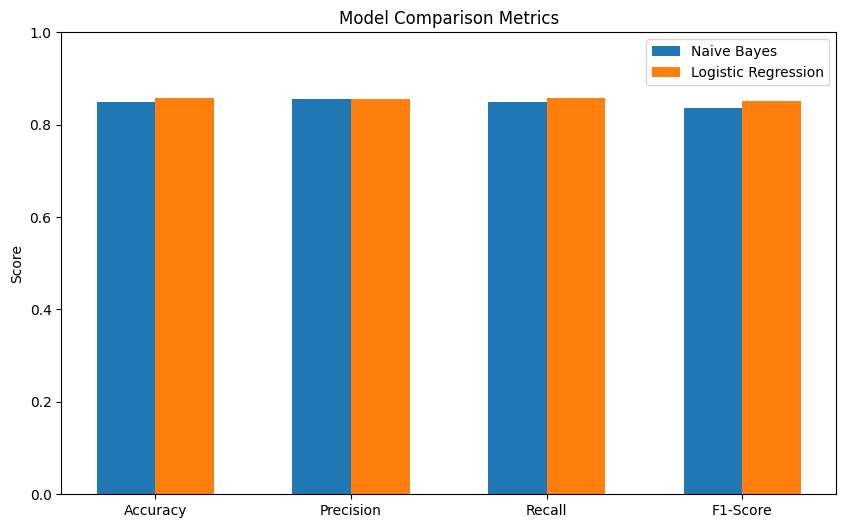

In [21]:
# Create a DataFrame from the comparison results dictionary
comparison_df = pd.DataFrame(comparison_results)

# Set the figure size for the plot (width=10, height=6)
plt.figure(figsize=(10,6))

# List of metrics to plot on the x-axis
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]

# Create a range object to represent x-axis positions for the metrics
x = range(len(metrics))

# Plot the first model's bars (Naive Bayes) slightly left-shifted for grouped bars
# comparison_df.iloc[0,1:] selects the first row (Naive Bayes) and all metric columns (skip 'Model')
plt.bar([i-0.15 for i in x], comparison_df.iloc[0,1:], width=0.3, label=comparison_df["Model"][0])

# Plot the second model's bars (Logistic Regression) slightly right-shifted for grouped bars
# comparison_df.iloc[1,1:] selects the second row (Logistic Regression) and all metric columns
plt.bar([i+0.15 for i in x], comparison_df.iloc[1,1:], width=0.3, label=comparison_df["Model"][1])

# Set the x-axis labels to the metric names
plt.xticks(x, metrics)
# Set y-axis limits from 0 to 1 (since scores are between 0 and 1)
plt.ylim(0,1)
plt.ylabel("Score")
plt.title("Model Comparison Metrics")
plt.legend()
plt.show()


## Explanation

- The bar chart visually compares Naive Bayes and Logistic Regression across four metrics: Accuracy, Precision, Recall, and F1-score.

- Each metric has two bars, making it easy to see which model performs better.

- Logistic Regression consistently scores higher on all metrics, especially Recall and F1-score.

- This confirms that Logistic Regression is more balanced and reliable than Naive Bayes for this news classification task.

- The visualization makes the performance gap clear without relying only on tables or numbers.

---
# 17. Predict news category 

In [25]:
def predict_category(title, excerpt, model, vectorizer):
    # Combine title and excerpt
    text = title + " " + excerpt
    # Transform text using the fitted TF-IDF vectorizer
    text_tfidf = vectorizer.transform([text])
    # Predict category using the trained model
    prediction = model.predict(text_tfidf)
    return prediction[0]
new_title = input("Enter the article Title: ")
new_excerpt = input("Enter the article Excerpt: ")

predicted_category = predict_category(new_title, new_excerpt, lr, tfidf)
print("\nPredicted Category:", predicted_category)


Enter the article Title:  Popeâ€™s Personal Doctor Dies from Coronavirus â€˜Complicationsâ€™
Enter the article Excerpt:  Pope Francis' personal doctor has died from Covid complications aged 78. Fabrizio Soccorsi, who was chosen as the pontiff's personal



Predicted Category: health


## Explanation

- The system first asks the user to enter a news Title and Excerpt.

- Both inputs are combined into a single text to capture full context.

- The text is converted into TF-IDF features using the trained vectorizer.

- The Logistic Regression model then analyzes these features.

- Based on learned patterns, the model predicts the category of the news.

- In this case, the input article was classified as health, indicating the content is most related to health-related topics.